In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
X, y = make_regression(n_samples=20, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=42)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

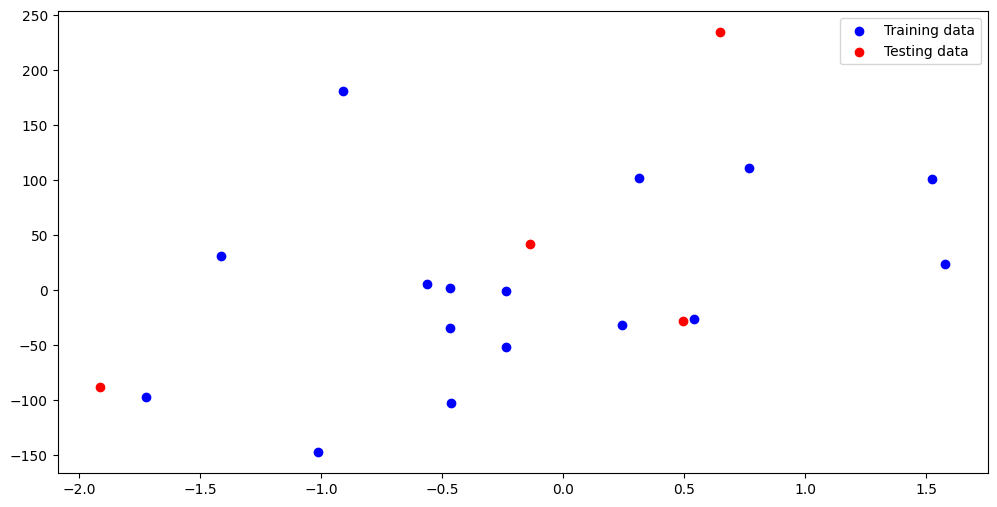

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label = 'Training data', color='b')
plt.scatter(X_test, y_test, label = 'Testing data', color='r')
plt.legend()
plt.show()

## Training the model using OLS Method

In [36]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
print("Intercept: ", lr.intercept_)
print("Coffeiect: ", lr.coef_)

Intercept:  19.142857489313712
Coffeiect:  [46.02881048]


In [39]:
r2_score(y_test, y_pred)

0.31128964549066607

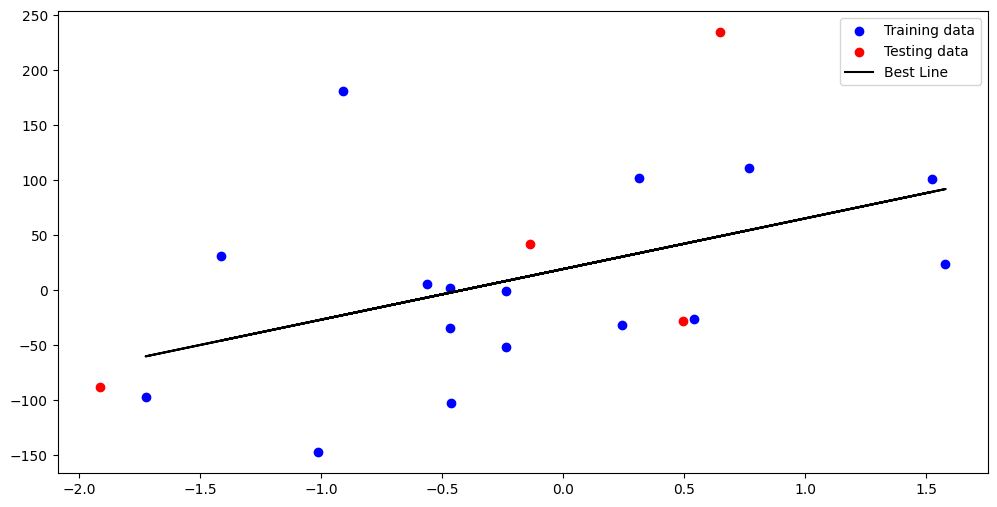

In [40]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label = 'Training data', color='b')
plt.scatter(X_test, y_test, label = 'Testing data', color='r')
plt.plot(X_train, lr.predict(X_train), label='Best Line', color='black')
plt.legend()
plt.show()

## Training the model using Gradient Descent

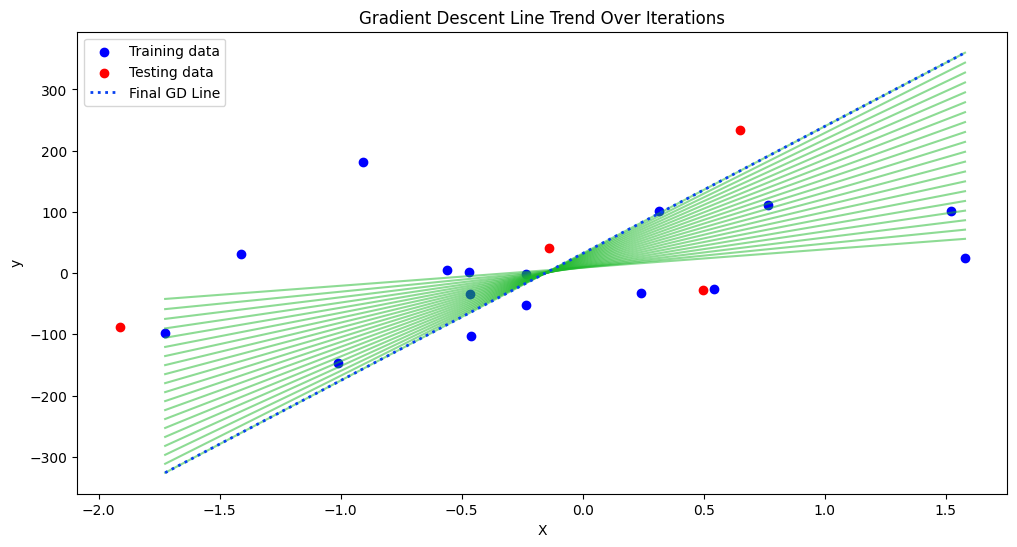

In [61]:
m = 20 #46.02881048     
b = 10 #19.142857489313712    
lr = 0.01   
epochs = 20

# Sort X_train for proper line plotting
X_plot = np.sort(X_train, axis=0)

plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label='Training data', color='b')
plt.scatter(X_test, y_test, label='Testing data', color='r')

# --- Gradient Descent Loop with trend ---
for i in range(epochs):
    y_pred = m * X_train + b
    
    # Compute gradients
    dm = -(2/len(X_train)) * np.sum((y_train - y_pred) * X_train.ravel())
    db = -(2/len(X_train)) * np.sum(y_train - y_pred)
    
    # Update parameters
    m = m - lr * dm
    b = b - lr * db
    
    # Plot the line for this iteration
    y_line = m * X_plot + b
    plt.plot(X_plot, y_line, color='#1DB82A', alpha=0.5)

# Final line
y_final = m * X_plot + b
plt.plot(X_plot, y_final, color='#0741F0', label='Final GD Line', linewidth=2, linestyle=':')

plt.title("Gradient Descent Line Trend Over Iterations")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()